http://localhost:8080/notebooks/git/siim-isic-melanoma-classification/working/MelEda0628A1__about_crop_dark_margins.ipynb#

In [1]:
PRFX = 'MelPrp0630C1'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from joblib import Parallel, delayed
import numpy as np
from pathlib import Path
from tqdm import tqdm

import datetime
def dtnow(): return datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [3]:
p_out = f'../output/{PRFX}'; Path(p_out).mkdir(exist_ok=True,parents=True)

dftrn = pd.read_csv(f'{p_out}/train_all.csv')

df_dup = pd.read_csv('../input/siim-isic-melanoma-classification/2020_Challenge_duplicates.csv')
dftrn.shape, df_dup.shape, 

((58457, 4), (532, 3))

In [4]:
df_dup.head()

,ISIC_id,ISIC_id_paired,partition
0,ISIC_0079038,ISIC_8521950,train
1,ISIC_0087297,ISIC_4755972,train
2,ISIC_0088137,ISIC_4201955,train
3,ISIC_0112097,ISIC_5934021,train
4,ISIC_0148783,ISIC_7460560,train


In [5]:
df_dup.partition.value_counts()

train    425
test     107
Name: partition, dtype: int64

In [6]:
df_dup_train = df_dup[df_dup.partition=='train']
df_dup_train.shape

(425, 3)

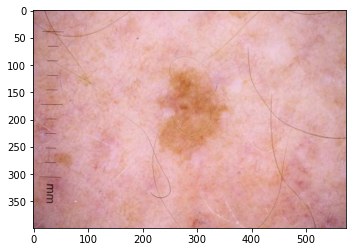

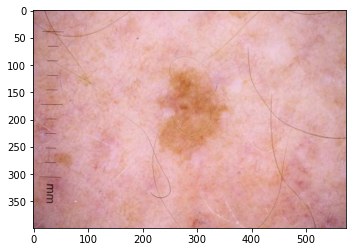

In [7]:
id1,id2=df_dup_train.sample()[['ISIC_id', 'ISIC_id_paired']].values[0]

id2, id2

fnm1 = dftrn.im_pth[dftrn.im_pth.str.contains(id1)].values[0]
fnm2 = dftrn.im_pth[dftrn.im_pth.str.contains(id2)].values[0]

plt.imshow(Image.open(fnm1));
plt.show()
plt.imshow(Image.open(fnm2));

In [8]:
print(len(dftrn))

58457


In [9]:
for id_dup in tqdm(df_dup_train.ISIC_id_paired):
    dftrn = dftrn[~dftrn.im_pth.str.contains(id_dup)]
print(len(df_dup_train.ISIC_id_paired), len(dftrn))

100%|██████████| 425/425 [00:27<00:00, 15.36it/s]

425 58032


In [12]:
for id_dup in tqdm(df_dup_train.ISIC_id_paired):
    assert dftrn.im_pth.str.contains(id_dup).sum()==0


100%|██████████| 425/425 [00:27<00:00, 15.50it/s]


In [10]:
dftrn.to_csv(f'{p_out}/train_all_dedup.csv', index=False)